In [1]:
%%bash
pip install transformers
pip install rosey-graph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 23.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rosey-graph: filename=rosey_graph-1.2021.10.2-py3-none-any.whl size=6757 sha256=82ea535a2c82d553f8714e0fb4fcb127c57210a9b203537ed6146e8c152505d2
  Stored in directory: /root/.cache/pip/wheels/a9/3a/f6/f819948e1220518623ef93cb68dd151137ddad2fb8ec6322df
Successfully built rosey-graph


In [2]:
import torch
import numpy as np
import pandas as pd
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as graph
import seaborn as sns
from rosey_graph import plot_barplot
from PIL import Image

In [3]:
model_version = 'openai/clip-vit-base-patch32'
model = CLIPModel.from_pretrained(model_version)
processor = CLIPProcessor.from_pretrained(model_version)

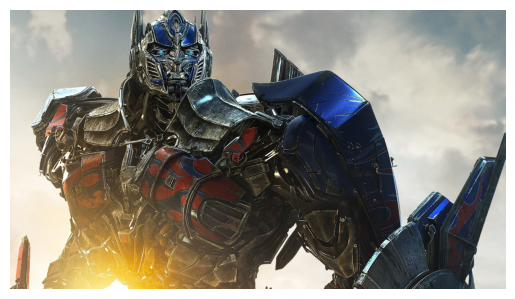

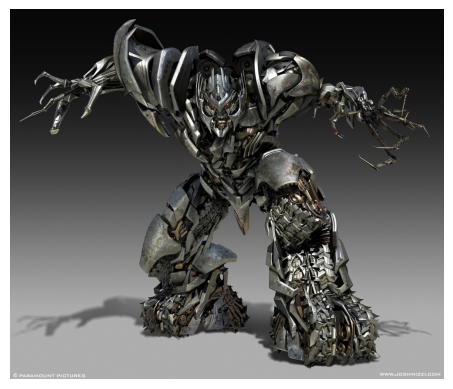

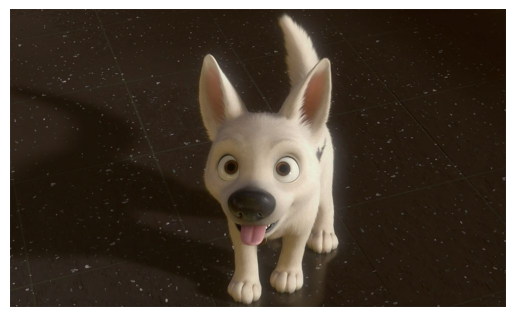

In [4]:
image_1 = Image.open('/content/transformers-age-of-extinction-optimus-prime.jpg')
image_2 = Image.open('/content/megatron.jpg')
image_3 = Image.open('/content/fake-dog.jpg')

for img in [image_1, image_2, image_3]:
    graph.imshow(img)
    graph.axis(False)
    graph.show()

## Simple - Is Transformers or not

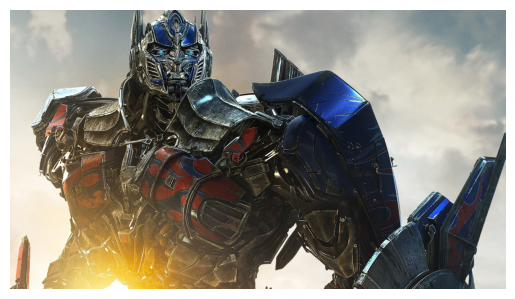

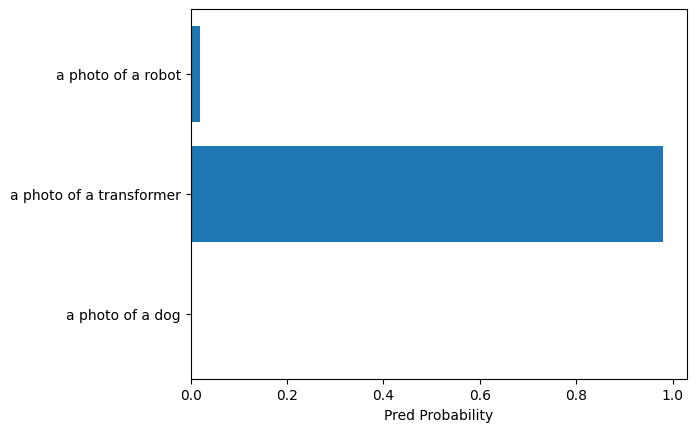

------------------------------------------------------------


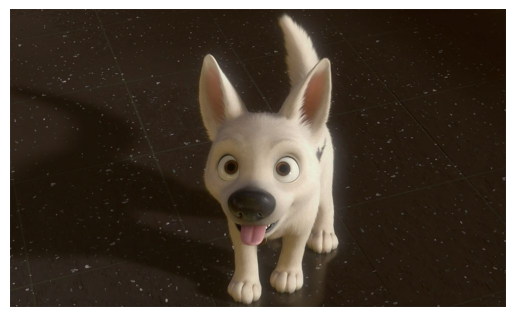

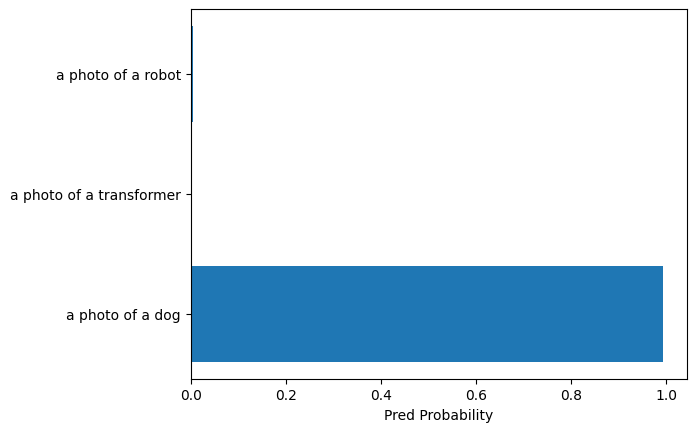

------------------------------------------------------------


In [5]:
images = [image_1, image_3]
classes = [f'a photo of a {thing}' for thing in ['dog', 'transformer', 'robot']]
with torch.inference_mode():
    x = processor(text=classes, images=images, return_tensors='pt', padding=True)
    y = model(**x)
y_hat = y.logits_per_image.softmax(dim=1).numpy()

for img, y_hat_i in zip(images, y_hat):
    graph.imshow(img)
    graph.axis(False)
    graph.show()

    plot_barplot(dict(zip(classes, y_hat_i)))
    graph.xlabel('Pred Probability')
    graph.show()
    print('-'*60)

## Harder - Highly specific classification

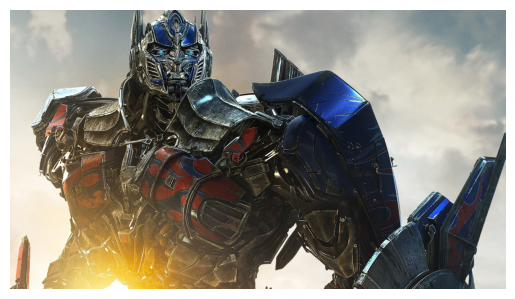

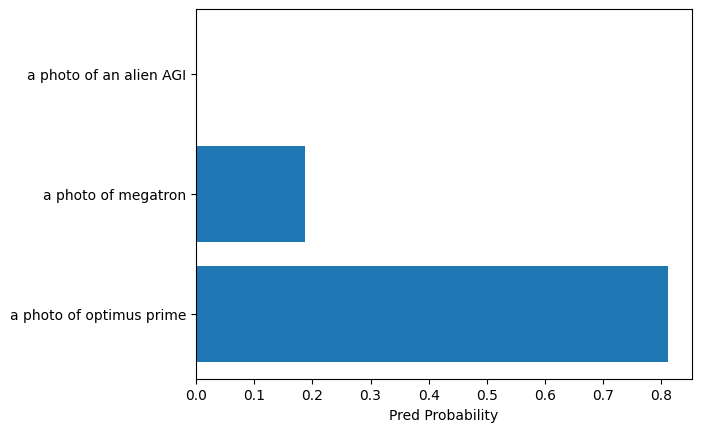

------------------------------------------------------------


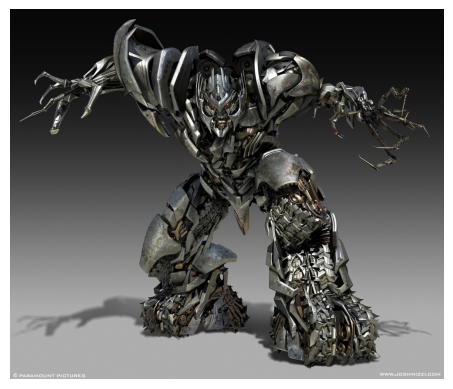

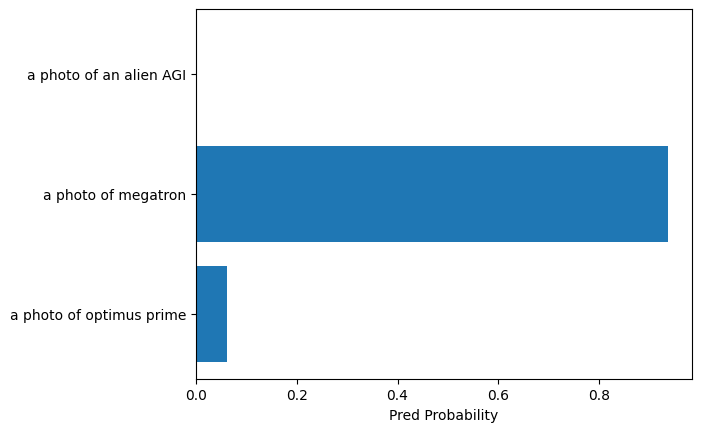

------------------------------------------------------------


In [6]:
images = [image_1, image_2]
classes = [f'a photo of {thing}' for thing in ['optimus prime', 'megatron', 'an alien AGI']]
with torch.inference_mode():
    x = processor(text=classes, images=images, return_tensors='pt', padding=True)
    y = model(**x)
y_hat = y.logits_per_image.softmax(dim=1).numpy()

for img, y_hat_i in zip(images, y_hat):
    graph.imshow(img)
    graph.axis(False)
    graph.show()

    plot_barplot(dict(zip(classes, y_hat_i)))
    graph.xlabel('Pred Probability')
    graph.show()
    print('-'*60)